<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Clustering basé sur la densité</center>


La plupart des techniques de clustering traditionnelles, telles que les k-means, le clustering hiérarchique et flou, peuvent être utilisées pour regrouper des données sans supervision.

Cependant, lorsqu'elles sont appliquées à des tâches avec des clusters de forme arbitraire ou des clusters au sein d'un cluster, les techniques traditionnelles peuvent ne pas être en mesure d'obtenir de bons résultats. Autrement dit, les éléments du même cluster peuvent ne pas partager suffisamment de similarités ou les performances peuvent être médiocres.
De plus, le clustering basé sur la densité localise les régions de haute densité qui sont séparées les unes des autres par des régions de faible densité. La densité, dans ce contexte, est définie comme le nombre de points dans un rayon spécifié.

Dans cette section, l'objectif principal sera de manipuler les données et les propriétés de DBSCAN et d'observer le clustering résultant.

Importez les bibliothèques suivantes :

<ul>
     <li> <b>numpy as np</b> </li>
     <li> <b>DBSCAN</b> de <b>sklearn.cluster</b> </li>
     <li> <b>make_blobs</b> de <b>sklearn.datasets.samples_generator</b> </li>
     <li> <b>StandardScaler</b> de <b>sklearn.preprocessing</b> </li>
     <li> <b>matplotlib.pyplot en tant que plt</b> </li>
</ul> <br>
N'oubliez pas <b> %matplotlib inline </b> pour afficher les tracés


In [17]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Génération de données

La fonction ci-dessous générera les points de données et nécessite ces entrées :

<ul>
     <li> <b>centroidLocation</b> : coordonnées des centroïdes qui généreront les données aléatoires. </li>
     <ul> <li> Exemple : saisie : [[4,3], [2,-1], [-1,4]] </li> </ul>
     <li> <b>numSamples</b> : le nombre de points de données que nous voulons générer, répartis sur le nombre de centroïdes (nombre de centroïdes définis dans centroidLocation) </li>
     <ul> <li> Exemple : 1500 </li> </ul>
     <li> <b>clusterDeviation</b> : l'écart type entre les clusters. Plus le nombre est grand, plus l'espacement est grand. </li>
     <ul> <li> Exemple : 0.5 </li> </ul>
</ul>


In [18]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Utilisez <b>createDataPoints</b> avec les <b>3 entrées</b> et stockez la sortie dans les variables <b>X</b> et <b>y</b>.


In [21]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### La modélisation

DBSCAN signifie Density-Based Spatial Clustering of Applications with Noise. Cette technique est l'un des algorithmes de clustering les plus courants qui fonctionne en fonction de la densité de l'objet.
L'idée est que si un point particulier appartient à un cluster, il doit être proche de beaucoup d'autres points de ce cluster.

Il fonctionne sur la base de deux paramètres : Epsilon et nombre de Points Minimum    
**Epsilon** détermine un rayon spécifié qui, s'il comprend un nombre suffisant de points, nous l'appelons zone dense     
**minimumSamples** détermine le nombre minimum de points de données que nous voulons dans un voisinage pour définir un cluster.


In [22]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 1, 2, ..., 2, 1, 1], dtype=int32)

### Distinguer les valeurs aberrantes

Remplaçons tous les éléments par « True » dans core_samples_mask qui se trouvent dans le cluster, « False » si les points sont des valeurs aberrantes.


In [23]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [25]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Visualisation de données


In [26]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


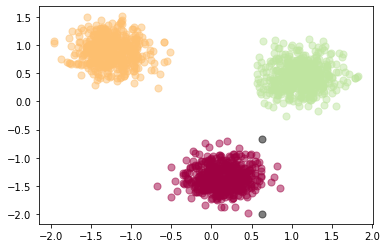

In [27]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

## Entraine toi

Pour mieux comprendre les différences entre les clusters partitionnels et basés sur la densité, essayez de regrouper l'ensemble de données ci-dessus en 3 clusters à l'aide de k-Means.
Remarque : ne générez pas les données encore, utilisez le même ensemble de données que ci-dessus.


In [ ]:
# write your code here




Double-click **here** for the solution.

<!-- Your answer is below:


from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()


-->


### Merci d'avoir terminé cette leçon !

Carnet créé par : <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Classe cognitive](https://cocl.us/DX0108EN_CC). Ce bloc-notes et son code source sont publiés sous les termes de la [Licence MIT](https://bigdatauniversity.com/mit-license/).​
